# Histogramació, rehistogramació i operacions de millora de contrast

## Histograma d'una imatge

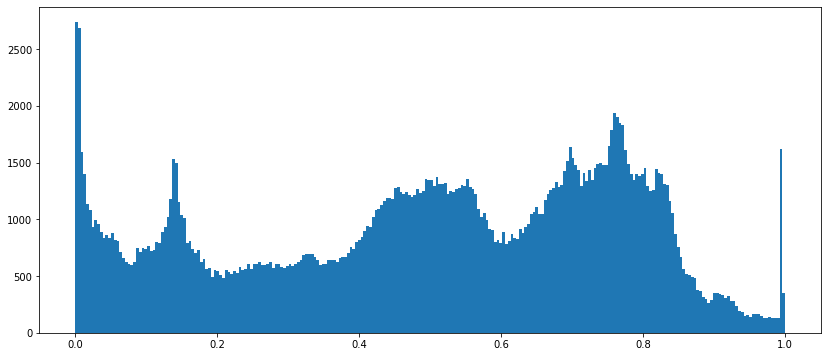

In [4]:
import skimage as sk # load skimage libraries
import matplotlib.pyplot as plt

IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
IG = sk.color.rgb2gray(IC) # convert from RGB to grayscale

v = IG.reshape(IG.shape[0]*IG.shape[1],1)# reshape the uint8 image as 1d array:
v = v[v>0] # remove pixels with value equal zero

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

### Cummulative probability distribution function
# Si dividim cada un dels valors pel número de píxels totals obtenim la probabilitat de que un pixel escollit tingui un vlaor de 1

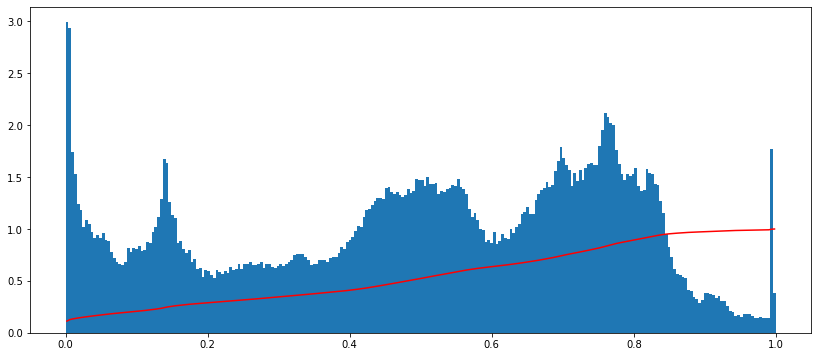

In [ ]:
 from skimage import exposure

I_cdf, bins = exposure.cumulative_distribution(IG)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.plot(bins, I_cdf,'r-')
plt.show()
# Creem una funció de distribució, mitjançant l'integral recorrent x diferencials


## Pixel statistics and image histograms:

Count histogram

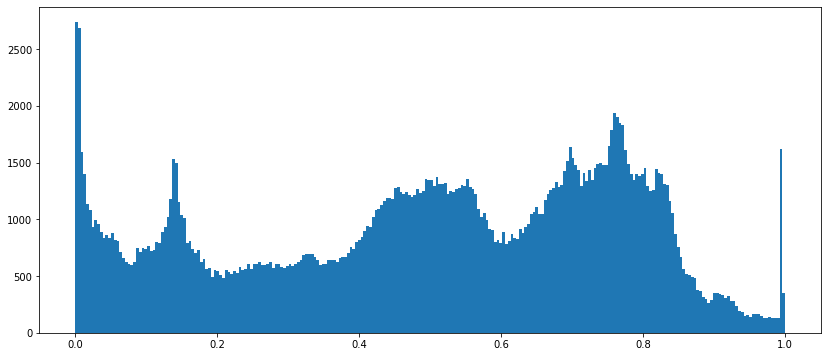

In [10]:
import matplotlib.pyplot as plt
import numpy as np 

I = sk.color.rgb2gray(IC)
# reshape the uint8 image as 1d array:
v = I.reshape(I.shape[0]*I.shape[1],1)
# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Count histogram: 

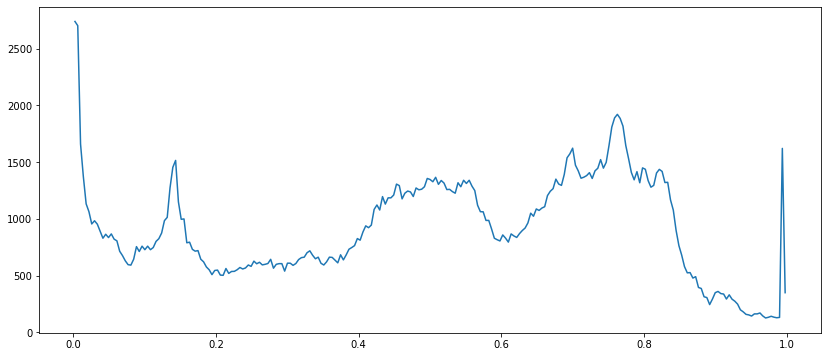

In [12]:
from skimage import exposure
counts,bins = exposure.histogram(v, nbins=255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, counts)
plt.show()

Normalized histogram (probability density function of pixel intensity levels):

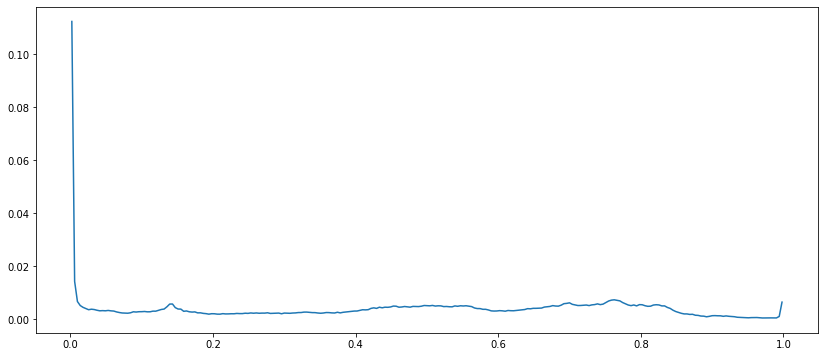

In [16]:
from skimage import exposure
counts,bins = exposure.histogram(IG, nbins=255)
p = counts/(IG.shape[0]*IG.shape[1])
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, p)
plt.show()

check that the area over the pdf is 1 (normalized):

In [17]:
p.sum()

1.0

### Global mean, median and standard deviation of an image:

In [20]:
print('Global mean of the image is = {}'.format(IG.mean()))
print('Global std of the image is = {}'.format(IG.std()))
print('Global median of the image is = {}'.format(np.median(IG)))


Global mean of the image is = 0.44195368474025365
Global std of the image is = 0.2955649364749817
Global median of the image is = 0.483376862745098


In [22]:
print('Sense valors a 0')
print('Global mean of the image is = {}'.format(v.mean()))
print('Global std of the image is = {}'.format(v.std()))
print('Global median of the image is = {}'.format(np.median(v)))

Sense valors a 0
Global mean of the image is = 0.4947390060106715
Global std of the image is = 0.26772647925719534
Global median of the image is = 0.5251756862745097


## Intensity transformations:

### Gamma correction:  

${\displaystyle V_{\text{out}}=A{V_{\text{in}}^{\gamma }}}$, where the non-negative real input value ${\displaystyle V_{\text{in}}}$ is raised to the power ${\displaystyle \gamma }$ and multiplied by the constant A, to get the output value ${\displaystyle V_{\text{out}}}$. In the common case of A = 1, inputs and outputs are typically in the range 0–1.
La corrección gamma, no-linealidad gamma, codificación gamma, o simplemente gamma, es como se denomina cierta operación no lineal que se usa para codificar y decodificar luminancia o valores triestimulos en sistemas de video o imagen.1​ La corrección gamma es, en su forma más sencilla, definida por la siguiente ley de potencias:

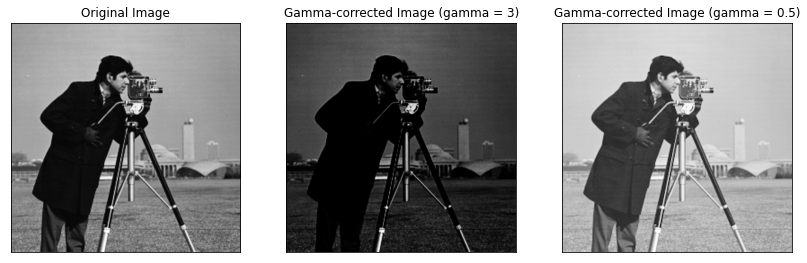

In [32]:
from skimage import data, exposure, img_as_float
from skimage import exposure

I = data.camera()


I_gamma_corrected_2 = exposure.adjust_gamma(I, 3)
I_gamma_corrected_05 = exposure.adjust_gamma(I, 0.5)

fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(I_gamma_corrected_2, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 3)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(I_gamma_corrected_05, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 0.5)'), plt.xticks([]), plt.yticks([])
plt.show()



Compare the cummulative distribution of pixel intensities:

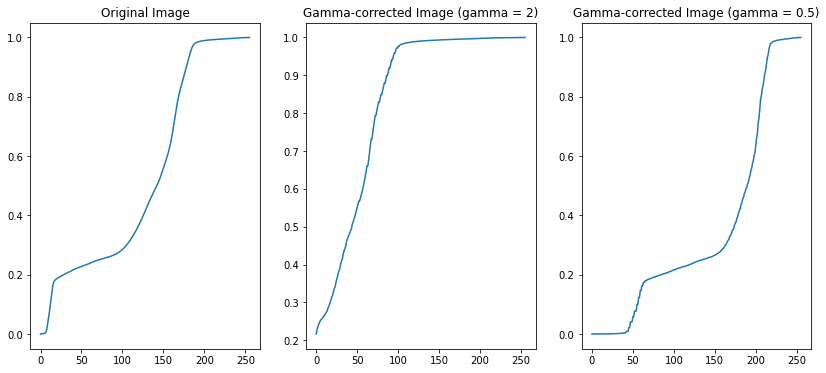

In [33]:
 from skimage import exposure

I_cdf, bins = exposure.cumulative_distribution(I)
I1_cdf, bins1 = exposure.cumulative_distribution(I_gamma_corrected_2)
I2_cdf, bins2 = exposure.cumulative_distribution(I_gamma_corrected_05)

    
fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.plot(bins, I_cdf)
plt.title('Original Image')
plt.subplot(132),plt.plot(bins1, I1_cdf)
plt.title('Gamma-corrected Image (gamma = 2)')
plt.subplot(133),plt.plot(bins2, I2_cdf)
plt.title('Gamma-corrected Image (gamma = 0.5)')
plt.show()

### Logarithmic transformation: 

This function transforms the input image pixelwise according to the equation $O = gain*log(1 + I)$ after scaling each pixel to the range 0 to 1. For inverse logarithmic correction, the equation is $O = gain*(2**I - 1)$.

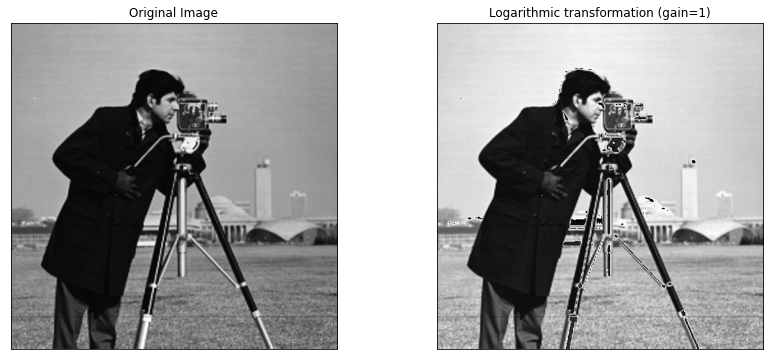

In [40]:
#sE RESALTAN CONTRONOS (CAMBIOS DE COLOR)
I_logarithmic_corrected = exposure.adjust_log(I, 1.2)
fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_logarithmic_corrected, cmap = 'gray')
plt.title('Logarithmic transformation (gain=1)'), plt.xticks([]), plt.yticks([])
plt.show()

## Compare Gamma correction and logarithmic transformation: 

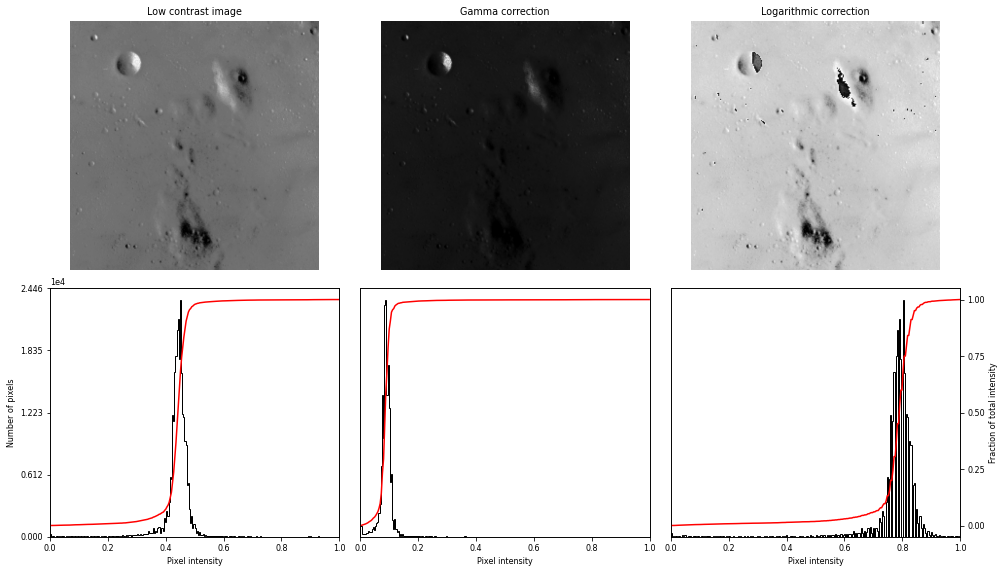

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 3)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1.5)

# Display results
fig = plt.figure(figsize=(14, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Rehistogramació

Modificar el contrast global d'una imatge mitjançant una transformació de les intensitats que canvia la forma de l'histograma. 

- **Contrast Stretching**: Reescalat d'intensitats

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity

$p_o = (p_i-c)*\frac{b-a}{d-c}+a$

Grayscale level range: $a=0, b=2^n-1$ 

Image pixel intensities range: $c=min(I), d = max(I)$

- **Equalització d'histograma**:

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist

- **Equalització adaptativa**:

Contrast Limited Adaptive Histogram Equalization (CLAHE).

Un algorisme per millorar el contrast local, que utilitza histogrames calculats en diferents regions de mosaic de la imatge. Per tant, es poden millorar els detalls locals fins i tot en regions més fosques o més clares que la majoria de la imatge.

https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist

L'exemple s'ha obtingut de:

https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html


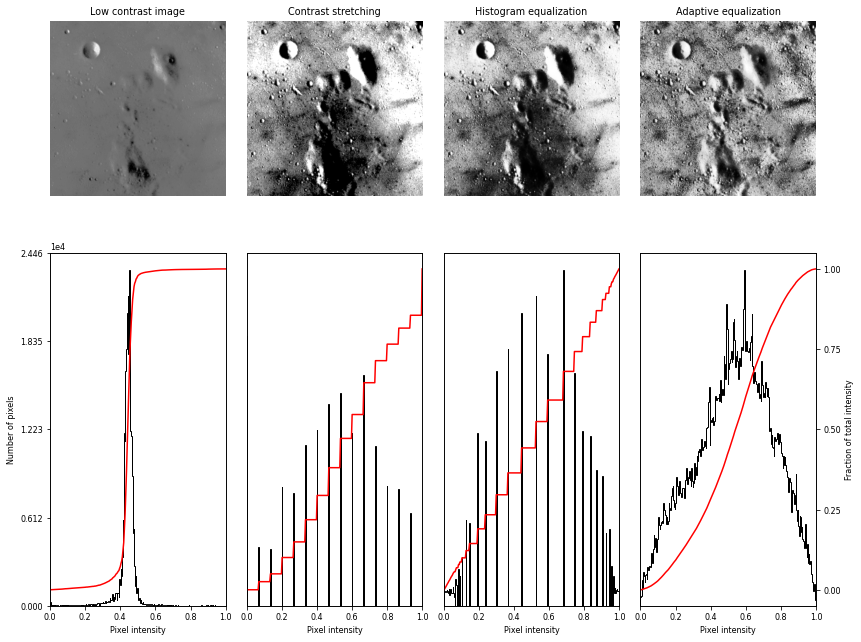

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (10, 90))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.1)

# Display results
fig = plt.figure(figsize=(12, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()